In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df=pd.read_csv('ecommerce.csv')

In [37]:
df.head()

,OrderID,CustomerName,Age,Product,Quantity,UnitPrice,PurchaseDate
0,ODR2000,afsal,56,SHOES,1.0,4669.829709,NaN
1,ODR2001,john,63,SHOES,1.0,3685.900973,05/02/2024
2,ODR2002,afsal,49,Watch,1.0,802.173721,NaN
3,ODR2003,Afsal,64,Watch,NaN,706.236483,2024-01-05
4,ODR2004,afsal,28,Shoes,-2.0,1469.446804,2024-01-05


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       700 non-null    object 
 1   CustomerName  608 non-null    object 
 2   Age           689 non-null    object 
 3   Product       609 non-null    object 
 4   Quantity      621 non-null    float64
 5   UnitPrice     690 non-null    float64
 6   PurchaseDate  568 non-null    object 
dtypes: float64(2), object(5)
memory usage: 38.4+ KB


In [39]:
df.isnull().sum()

OrderID           0
CustomerName     92
Age              11
Product          91
Quantity         79
UnitPrice        10
PurchaseDate    132
dtype: int64

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
df["CustomerName"] = df["CustomerName"].astype(str).str.strip().str.title()
df["CustomerName"] = df["CustomerName"].replace("None", pd.NA)
df["CustomerName"] = df["CustomerName"].fillna("Unknown")

In [42]:
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [43]:
df["Product"] = df["Product"].astype(str).str.strip().str.title()
df["Product"] = df["Product"].replace("None", pd.NA)
df["Product"] = df["Product"].fillna("Unknown")

In [44]:
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")   
df["Quantity"] = df["Quantity"].replace({0: None, -2: None})      
df["Quantity"] = df["Quantity"].fillna(df["Quantity"].median())   

In [45]:
df["UnitPrice"] = pd.to_numeric(df["UnitPrice"], errors="coerce")
df["UnitPrice"] = df["UnitPrice"].replace(99999, df["UnitPrice"].median())
df["UnitPrice"] = df["UnitPrice"].fillna(df["UnitPrice"].median())

In [46]:
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"], errors="coerce")
df["PurchaseDate"] = df["PurchaseDate"].fillna(df["PurchaseDate"].mode()[0])

In [47]:
df = df.drop_duplicates()

In [48]:
df.head


<bound method NDFrame.head of      OrderID CustomerName        Age Product  Quantity    UnitPrice  \
0    ODR2000        Afsal  56.000000   Shoes       1.0  4669.829709   
1    ODR2001         John  63.000000   Shoes       1.0  3685.900973   
2    ODR2002        Afsal  49.000000   Watch       1.0   802.173721   
3    ODR2003        Afsal  64.000000   Watch       3.0   706.236483   
4    ODR2004        Afsal  28.000000   Shoes       3.0  1469.446804   
..       ...          ...        ...     ...       ...          ...   
695  ODR2695         John  31.000000   Shoes       3.0  2820.678146   
696  ODR2696        Maria  55.000000   Watch       1.0  3319.481859   
697  ODR2697         John  41.587253   Watch       3.0  2252.586261   
698  ODR2698        Maria  62.000000     Nan       4.0  3685.900973   
699  ODR2699         John  51.000000     Bag       1.0  1587.070818   

    PurchaseDate  
0     2024-05-02  
1     2024-05-02  
2     2024-05-02  
3     2024-05-02  
4     2024-05-02  
.. 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       700 non-null    object        
 1   CustomerName  700 non-null    object        
 2   Age           700 non-null    float64       
 3   Product       700 non-null    object        
 4   Quantity      700 non-null    float64       
 5   UnitPrice     700 non-null    float64       
 6   PurchaseDate  700 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 38.4+ KB


# 1. Product Count

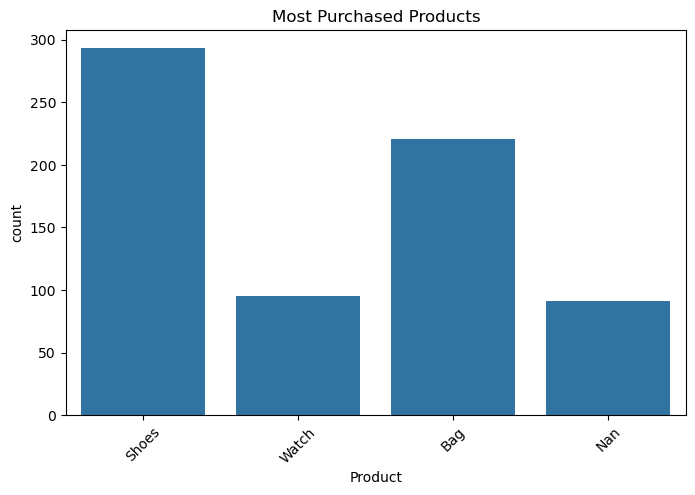

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x="Product", data=df)
plt.title("Most Purchased Products")
plt.xticks(rotation=45)
plt.show()

The bar chart shows the most commonly purchased products.

# 2. Customer Age Distribution

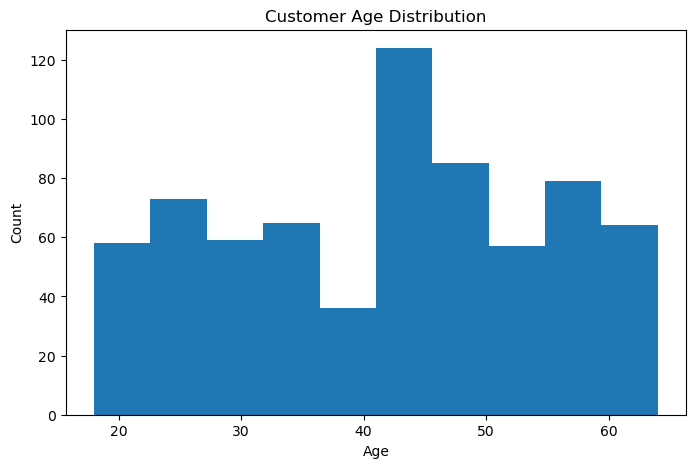

In [51]:
plt.figure(figsize=(8,5))
plt.hist(df["Age"], bins=10)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The histogram shows that customers are mostly between 25 and 50 years old.

# 3. Quantity vs Unit Price

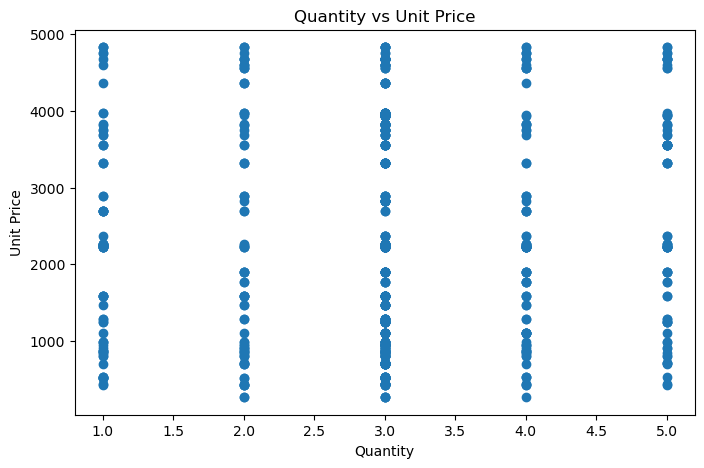

In [52]:
plt.figure(figsize=(8,5))
plt.scatter(df["Quantity"], df["UnitPrice"])
plt.title("Quantity vs Unit Price")
plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.show()

The scatter plot shows no strong relationship between quantity and price.

# 4. Correlation Heatmap

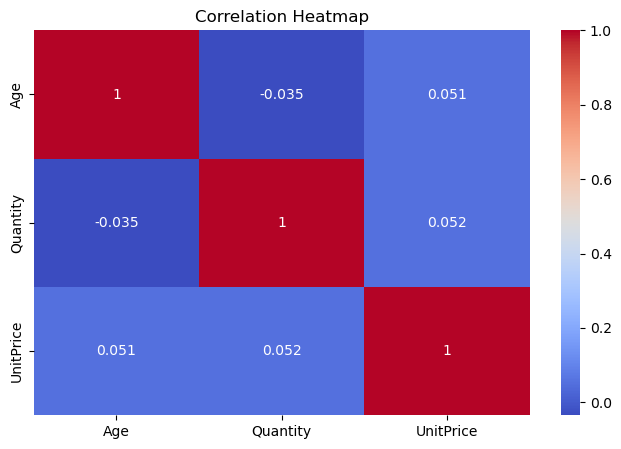

In [54]:
df_numeric = df.select_dtypes(include=["int64","float64"])
plt.figure(figsize=(8,5))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Age, quantity, and price do not show strong correlations.

# CONCLUTION

The cleaned e-commerce dataset reveals that Shoes and Bags are the most purchased items, with most customers falling within the 25–50 age range. Quantity and price do not correlate strongly, meaning customers purchase similar quantities regardless of product cost.